<a href="https://colab.research.google.com/github/AmiMunshi/MachineLearningNew/blob/main/DeepLearning_OneHiddenLayer_MultipleNodes_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Import the relevant packages needed for impelementation

In [ ]:
#Import the necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve,roc_auc_score
%matplotlib inline
import warnings #to remove the warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

<h2>Q1. To load the dataset, ascertain shape of the X (Predictor)variable and Y (Target variable)

In [ ]:
#Read the train dataset
df= pd.read_csv('C:/Users/mpstme.student/Documents/70282200011_ML/Tee2.csv')

In [ ]:
#Visualize the dataframe
df.head()

,X1,X2,Y
0,-0.364192,-0.249755,0
1,-0.069578,-0.378600,0
2,0.406800,-0.318816,0
3,-1.953366,-0.284564,1
4,0.368430,-0.957329,1


In [ ]:
#to know the size of the data set
df.shape

(200, 3)

In [ ]:
#Extract the independent or predictor variables
X= df.drop(['Y'],axis=1)

#Ascertain the shape of the data set
X.shape



(200, 2)

In [ ]:
#Extract the target variables
y=df[['Y']]

#Ascertain the shape of the data set
y.shape

(200, 1)

<h2> Q2. Plot the data to see the pattern

Text(0.5, 1.0, 'Scatter plot of the dataset')

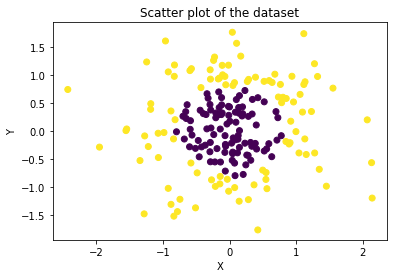

In [ ]:
#To visualize the dataset
plt.scatter(df.X1,df.X2,c=df.Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of the dataset")

<b>Remark: We observe from the above dataset that the data is nonlinear.

<h2> Q3. Run a logistic regression using built in package of sklearn.

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [ ]:
#Implementing Logistic Regression using sklearn
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Make prediction for the test data
y_pred= modelLogistic.predict(x_test) 

<b>Logistic regression model evaluation

In [ ]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[13  9]
 [13  5]]


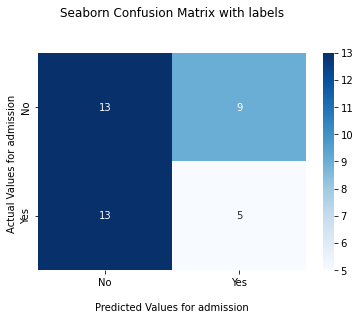

In [ ]:
ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values for admission')
ax.set_ylabel('Actual Values for admission ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No','Yes'])
ax.yaxis.set_ticklabels(['No','Yes'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
#Accuracy score
Accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the model is: ", Accuracy)

Accuracy of the model is:  0.45


<b>Remark: Logistic Regression Model Accuracy is 60%

<h2> Q4 Build a neural network model with one hidden layer (4 units), one input layer (2 units) and one output layer (one unit).
     Allow the neural networks to learn with some good amount of iteration to findout weight matrices and bias vectors.

In [ ]:
# splitting the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [ ]:
#taking transpose of train and test data
X_train=X_train.transpose()
y_train=y_train.transpose()
X_test=X_test.transpose()
y_test=y_test.transpose()

In [ ]:
#visualize train predictor data
X_train.head()

,90,115,32,80,105,15,34,143,182,51,...,84,75,74,55,187,130,85,52,157,131
X1,0.031376,0.390456,0.130491,1.152758,0.283403,1.060180,-0.919975,-1.282179,0.195048,-2.429296,...,1.116432,-0.879109,-0.000062,-0.920461,0.562483,-0.063130,0.712577,-0.657713,0.048182,0.005499
X2,-0.213749,0.962767,-0.077263,-0.416241,0.263673,0.655806,1.056643,-1.474942,0.433062,0.742965,...,1.738620,0.359890,0.431940,-1.019907,-1.025795,-0.711785,-0.159617,0.347399,-0.374189,0.176359


In [ ]:
#Visualize train target data
y_train.head()

,90,115,32,80,105,15,34,143,182,51,...,84,75,74,55,187,130,85,52,157,131
Y,0,1,0,1,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,0


In [ ]:
#Convert train target data to numpy array for ease in processing
y_train=np.array(y_train)

In [ ]:
#To ascertain the shape of training X and y
#We take the count of number of samples in variable m
m=y_train.shape[1]
print("Shape of input matrix X is: ",X_train.shape)
print("Shape of input matrix Y is: ",y_train.shape)
print("No of training samples is: ",m)

Shape of input matrix X is:  (2, 140)
Shape of input matrix Y is:  (1, 140)
No of training samples is:  140


In [ ]:
#Function to ascertain the number of nodes in input layer, output layer and hidden layer
def layer_sizes(X, y, n_h):
  
    n_x= X.shape[0] #the size of the input layer
    n_h=n_h #the size of the hidden layer
    n_y=y.shape[0] #the size of the output layer
    
    return (n_x, n_h, n_y)

In [ ]:
#Function to initialize parameters W and b. Function will return the values of W and b
def initialize_parameters(n_x, n_h, n_y):
    
    #These four lines of the code can be used to generate random matrix for W1 and W2

    W1= np.random.randn(n_h,n_x)*0.1 #weight matrix of shape (n_h, n_x)
    W2=np.random.randn(n_y,n_h)*0.1#weight matrix of shape (n_y, n_h)
    b1= np.zeros(shape=(n_h,1)) #bias vector of shape (n_h, 1)
    b2= np.zeros(shape=(n_y,1)) #bias vector of shape (n_y, 1)
    return W1,W2,b1,b2
   

Forward Propagation

In [ ]:
#Function to implement forward_propagation
#this function will obtain the values of Z1, A1, Z2 A2 and cost
def forward_propagation(X,W1,W2,b1,b2):
    Z1= np.dot(W1,X)+b1
    #A1= 1/(1+np.exp(-Z1)) #Using sigmoid function for the last layer
    A1= np.tanh(Z1) #Using tanh function for the middle layer
    Z2= np.dot(W2,A1)+b2
    A2= 1/(1+np.exp(-Z2)) #Using sigmoid function for the last layer
    
    return Z1,A1,Z2,A2

Cost function

In [ ]:
#Function to compute cost function
def compute_cost(A2, Y, m):
    logJ= np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    J=-(1/m)*np.sum(logJ)
    
    return (J)

Backward Propagation

In [ ]:
def backward_propagation(W1,W2,A1,A2,Y,m,X):
    dZ2= A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1,keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1,keepdims=True)
    return dZ2,dW2,db2,dZ1,dW1,db1,db2

In [ ]:
#Function to update the parameter W and b values
#This function will return upadted values of W1, W2, b1, b2
def update_parameters(W1,W2,b1,b2,dW1,dW2,db1,db2,alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

In [ ]:
#This single function will call all the functions and retrun the cost function values
#and the final value of the W and b parameters
def iterations(X,y,iterNo, alpha, n_h):
    J=np.zeros(iterNo)
    n_x,n_h,n_y= layer_sizes(X,y, n_h)
    W1,W2,b1,b2=initialize_parameters(n_x, n_h, n_y)
    for i in range(iterNo):

        Z1,A1,Z2,A2=forward_propagation(X,W1,W2,b1,b2)
        cost=compute_cost(A2,y,m)
        #if iterNo%8==0:
            #print(cost)
        
        J[i]=cost
        dZ2,dW2,db2,dZ1,dW1,db1,db2=backward_propagation(W1,W2,A1,A2,y,m,X)
        W1,b1,W2,b2=update_parameters(W1,W2,b1,b2,dW1,dW2,db1,db2,alpha)
    return W1,b1,W2,b2,J
  

In [ ]:
#Enter the number of iterations for which we want to run the loop for forward and
#backward propagation
iterNo=int(input("Enter the number of iterations: "))
alpha= float(input("Enter the learning rate: "))
n_h= int(input("Enter the number of nodes in hidden layer: "))

Enter the number of iterations: 50000
Enter the learning rate: 0.005
Enter the number of nodes in hidden layer: 4


In [ ]:
W1, b1,W2,b2,J= iterations(X_train,y_train,iterNo, alpha, n_h)
#print("The cost for {} iterations is \n {}".format(iterNo, J))

<h2> For iterations= 50000, learning rate = 0.005 and number of units in hidden layer =4

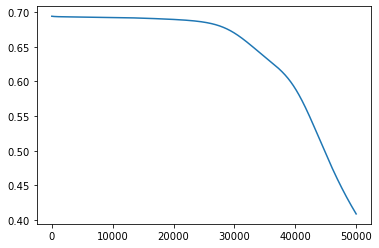

In [ ]:
#Plot the cost 
plt.plot(J)

In [ ]:
#Output for weight and bias matrices 
print("Final W1\n", W1)
print("Final W2\n", W2)
print("Final b1\n", b1)
print("Final b2\n", b2)

Final W1
 [[ 1.26242976  0.53578541]
 [-2.13623993 -2.17139327]
 [-0.61678671 -0.31104908]
 [-0.20477232  1.58164374]]
Final W2
 [[-1.40538572 -2.58638374  0.83973301 -1.21150459]]
Final b1
 [[0.55891511]
 [1.37181289]
 [0.03600436]
 [0.8822087 ]]
Final b2
 [[2.04360058]]


<h2>With iterations= 50000, learning rate = 0.005 and number of units in hidden layer =4, checking the accuracy for the training set

In [ ]:
#Obtain the value of A2 and predicted target variable for training set
Z1,A1,Z2,A2=forward_propagation(X_train,W1,W2,b1,b2)
#print(A2)
y_train_pred= np.where(A2>0.5, 1,0)

In [ ]:
count= np.where(y_train_pred==y_train,1,0)
print(np.sum(count))
accuracy= np.sum(count)/y_train.shape[1]
print("Training Accuracy is: ",accuracy)

123
Training Accuracy is:  0.8785714285714286


<h3> Remark: With iterations= 50000, learning rate = 0.005 and number of units in hidden layer =4, Accuracy of the training dataset is 82.14%

<h2>With iterations= 50000, learning rate = 0.005 and number of units in hidden layer =4, checking the accuracy for the testing set

In [ ]:
y_test=np.array(y_test)
Z1,A1,Z2,A2=forward_propagation(X_test,W1,W2,b1,b2)
y_test=np.array(y_test)
y_test_pred= np.where(A2>0.5, 1,0)
count= np.where(y_test_pred==y_test,1,0)
accuracy= np.sum(count)/y_test.shape[1]
print("Testing Accuracy is: ",accuracy)

Testing Accuracy is:  0.8333333333333334


<h3> Remark: With iterations= 50000, learning rate = 0.005 and number of units in hidden layer =4, Accuracy of the training dataset is 82.14%



<h2> Q5 Generic code to try neural network model with one hidden and [1,2,3,4,5,20 and 50] units in one hidden layer. Analyse the reult in terms of accuracy. To find whcih model to choose as final model



In [ ]:
#Number of units that we want in one hidden layer
units= np.array([1,2,3,4,5,20,50])


In [ ]:
# splitting the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [ ]:
#taking transpose of train and test data
X_train=X_train.transpose()
y_train=y_train.transpose()
X_test=X_test.transpose()
y_test=y_test.transpose()
y_train=np.array(y_train)
y_test=np.array(y_test)

Enter the number of iterations: 50000
Enter the learning rate: 0.0075


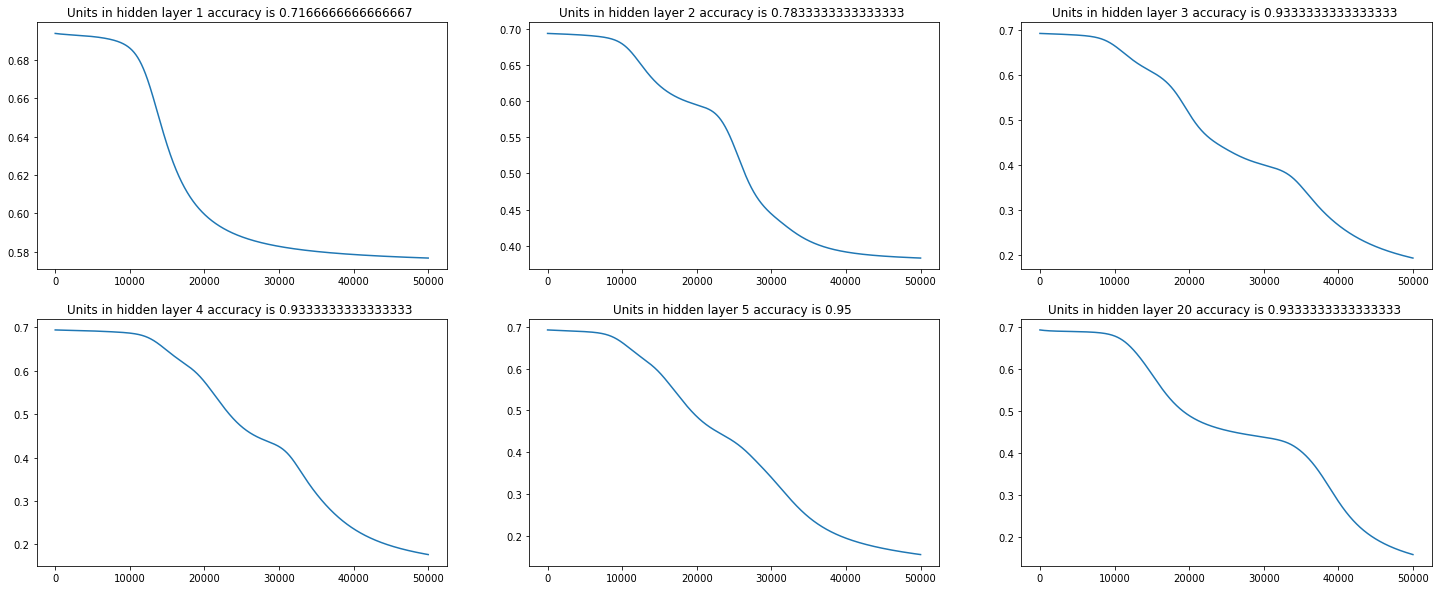

In [ ]:
#Set the figure size for the plot
plt.figure(figsize=(25,10)) 

#Ask from the user number of iterations, learning rate
iterNo=int(input("Enter the number of iterations: "))
alpha= float(input("Enter the learning rate: "))

#Create an array to store accuracy corresponding to various units in hidden layer
accuracy=np.zeros(len(units))

#This loop will run for total number of values in the units array
for i in range(len(units)): 
    
    #Call iterations function to obtain the final values for weigh and bias matrices
    W1, b1,W2,b2,J= iterations(X_train,y_train,iterNo, alpha,units[i])
   
    Z1,A1,Z2,A2=forward_propagation(X_test,W1,W2,b1,b2)
    y_test=np.array(y_test)
    y_test_pred= np.where(A2>0.5, 1,0)
    count= np.where(y_test_pred==y_test,1,0)
    accuracy[i]= np.sum(count)/y_test.shape[1]
    try:
        plt.subplot(2,3,i+1)
        plt.plot(J)
        plt.title("Units in hidden layer {} accuracy is {} ".format(units[i], accuracy[i]))
    except:
        pass
    
    


In [ ]:
df1 = pd.DataFrame(list(zip(units, accuracy)),columns =['Units in hidden layer', 'Accuracy'])
df1

,Units in hidden layer,Accuracy
0,1,0.716667
1,2,0.783333
2,3,0.933333
3,4,0.933333
4,5,0.950000
5,20,0.933333
6,50,0.933333


Text(0.5, 1.0, 'Plot of number of hidden layer units versus accuracy')

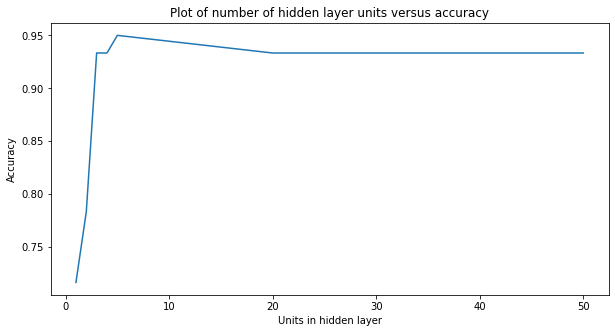

In [ ]:
#Plot of number of hidden layer units versus accuracy
plt.figure(figsize=(10,5))
plt.plot(df1['Units in hidden layer'],df1['Accuracy'])
plt.xlabel("Units in hidden layer")
plt.ylabel("Accuracy")
plt.title("Plot of number of hidden layer units versus accuracy")

<h2>Conclusion:  We have implemented Neeural network with one input layer(two units), one hidden layer(variable units) and one output layer (one unit). Number of units taken in the hidden layer were 1,2,3,4,5,20 and 50.
From the plots and the dataframe above, it is observed that for 50,000 iterations and learning rate= 0.0075, the accuracy obtained for anything above 20 layers is 93.33%. So we can conclude that after a certain increase in number of hidden layers, there not much change in accuracy. Then we need to try other parameters like learning rate or number of iterations.